In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda
import datetime
import salem
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map
import shapely.geometry as shpg


pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:

tag = 'satellite'
g = GoogleVisibleMap(x=[-80, 140], y=[-40, 30],
                     scale=2,  # scale is for more details
                     maptype=tag)  # try out also: 'terrain'

Text(0.5, 1.0, 'Google static map')

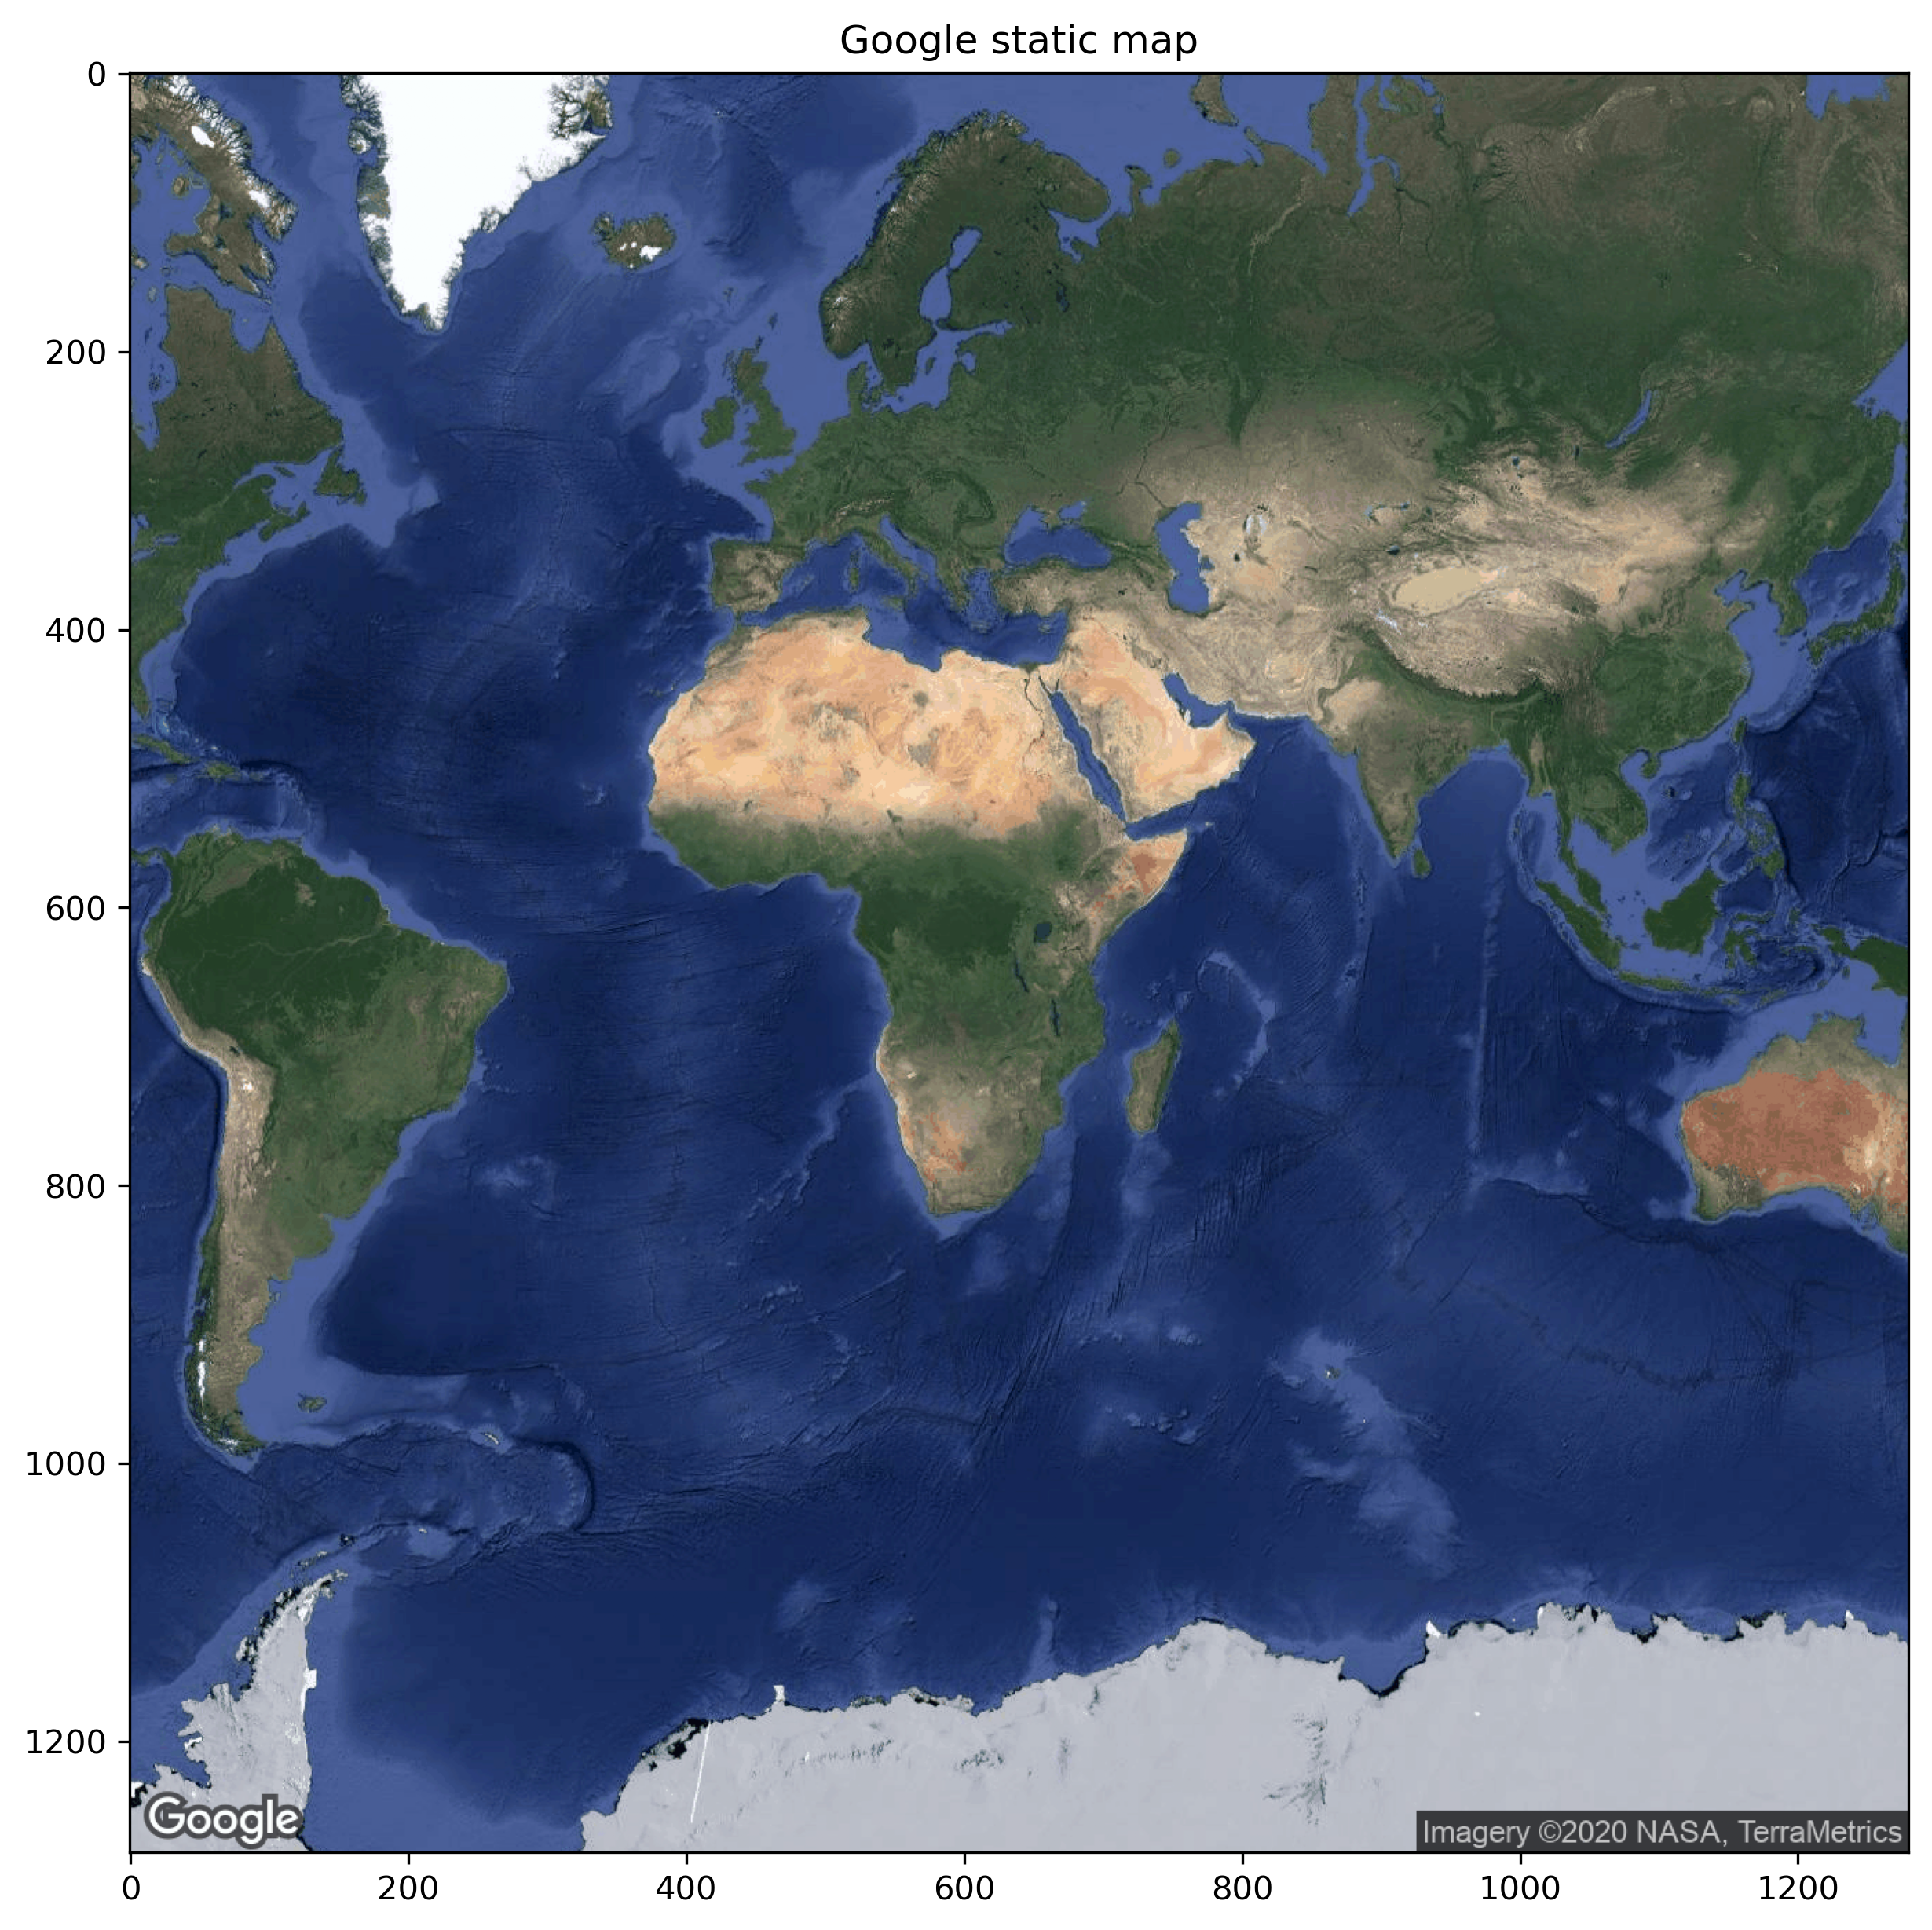

In [4]:
f = plt.figure(figsize=(15,10), dpi=300)
ax1 = f.add_subplot(111)
# the google static image is a standard rgb image
ggl_img = g.get_vardata()
ax1.imshow(ggl_img)

ax1.set_title('Google static map')


In [5]:
g.set_subset(corners=[(-82,-45),(142,48)])
ggl_img = g.get_vardata()

/home/ck/miniconda3/lib/python3.7/site-packages/descartes/patch.py:87: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return PathPatch(PolygonPath(polygon), **kwargs)


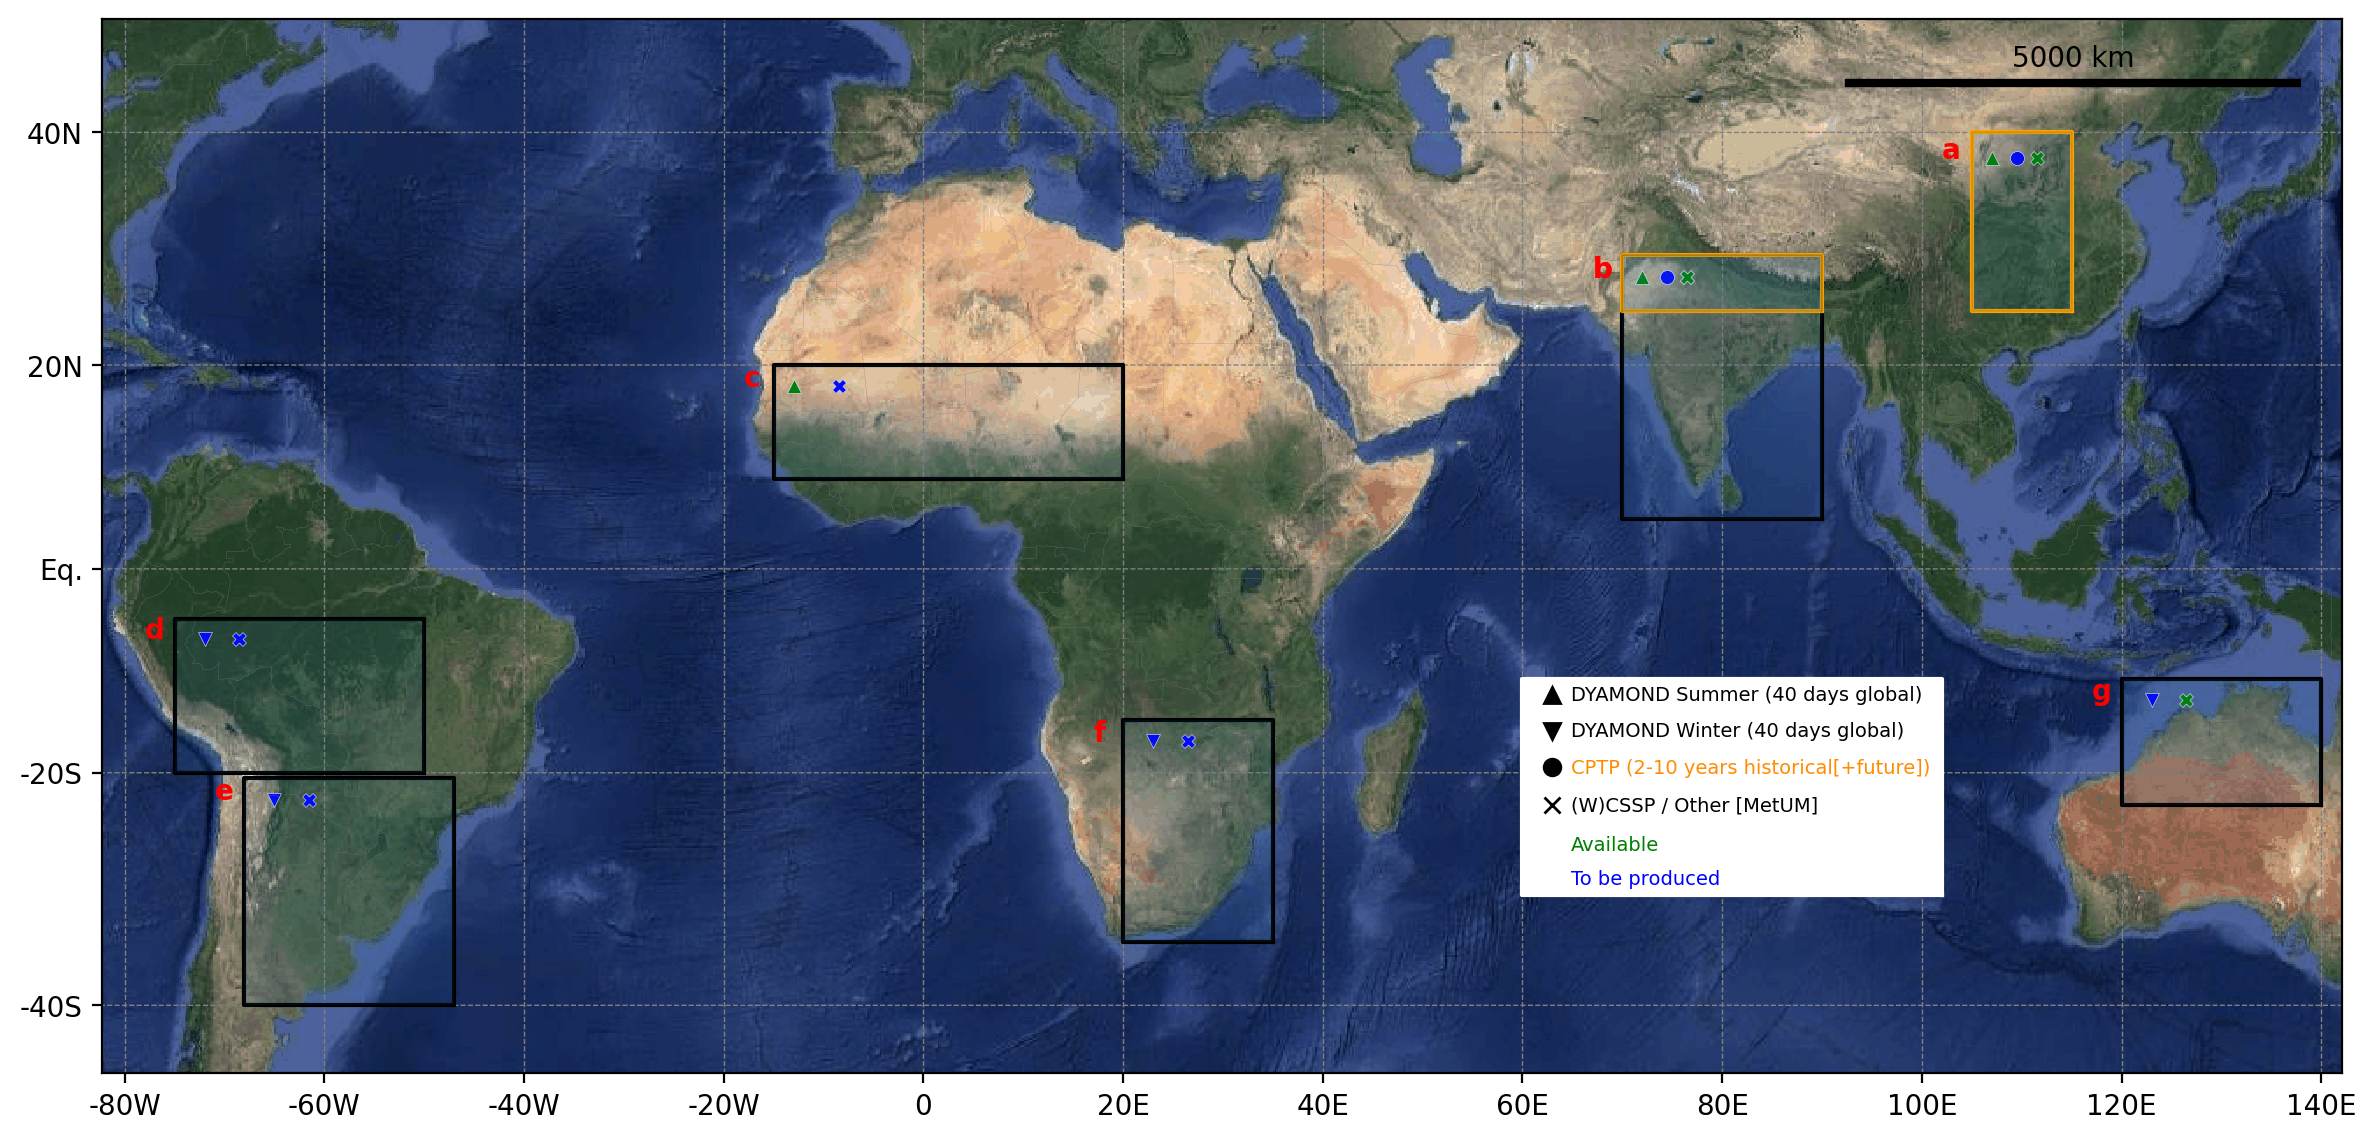

In [6]:
regions = {
    'india' : ([70,90, 5,30], 'k', 'solid', 0.8, ("^", 'g'), ("", 'b') , ("o", 'b'), ("X", 'g'), 'b'),
    'india_cptp' : ([70,90, 25,30], 'k', 'solid', 0.8, ("^", 'g'), ("", 'b') , ("o", 'b'), ("X", 'g'), 'b'),
    #'cptp' : ([70,115,25,40], 'blue', 'dashed', 2, ('o', 'k')),
    'china' : ([105,115,25,40], 'k', 'solid', 0.8, ("^", 'g') , ("", 'b') , ("o", 'b'), ("X", 'g'), 'a'),
    'australia' : ([120,140,-23, -11], 'k', 'solid', 0.8, ('', 'k'), ("v", 'b') , ("", 'b'), ("X", 'g'), 'g'),
    'sa' : ([20,35, -35,-15], 'k', 'solid', 0.8, ('', 'k'), ("v", 'b'),  ("", 'b'), ("X", 'b'), 'f'),
    'sub_ssa' : ([-68,-47, -40, -20.5], 'k', 'solid', 0.8, ('', 'k'), ("v", 'b') ,  ("", 'b'), ("X", 'b'), 'e'),
    'trop_ssa' : ([-75, -50, -20, -5], 'k', 'solid', 0.8, ('', 'g'), ("v", 'b'), ("", 'b') , ("X", 'b'), 'd'),
    'sahel' : ([-15, 20, 9, 20], 'k', 'solid', 0.8, ("^", 'g'), ("", 'b'), ("", 'b') , ("X", 'b'), 'c')
    }


f = plt.figure(figsize=(12,6), dpi=200)
ax1 = f.add_subplot(111)
# make a map of the same size as the image (no country borders)



sm = Map(g.grid, factor=1)
# Change the country borders
sm.set_shapefile()
sm.set_shapefile(countries=True, color='grey', linewidths=0.05)

# Change the lon-lat countour setting
sm.set_lonlat_contours()
sm.set_lonlat_contours( interval=20, linewidths=0.5,
                         linestyles='dashed', colors='grey')

sm.set_rgb(ggl_img)  # add the background rgb image
sm.set_scale_bar(location=(0.88, 0.94))  # add scale
if tag == 'terrain':
    ec = 'k'
else:
    ec = 'w'
for reg in regions.keys():
        #sm.set_geometry()
        coord = (regions[reg])[0]
        #ipdb.set_trace()
        geom = shpg.box(coord[0], coord[2], coord[1], coord[3])
        if (reg == 'india_cptp') | (reg=='china'):
            edc = 'orange'
        else:
            edc = (regions[reg])[1]
        sm.set_geometry(geom, zorder=99, facecolor=None,edgecolor=edc, linewidth=(regions[reg])[3], linestyle=(regions[reg])[2], alpha=0.1) 
        
        x, y = sm.grid.transform(coord[0]-3, coord[3]-2)
        plt.text(x,y,(regions[reg])[8], fontweight='bold', color='red')

        points = (regions[reg])[4]
        x, y = sm.grid.transform(coord[0]+2, coord[3]-2)
        plt.scatter(x, y, color=points[1],marker=points[0], s=25, edgecolor=ec, linewidth=0.2)
        
        points = (regions[reg])[5]
        x, y = sm.grid.transform(coord[0]+3, coord[3]-2)
        plt.scatter(x, y, color=points[1],marker=points[0], s=25, edgecolor=ec, linewidth=0.2)
        
        points = (regions[reg])[6]
        x, y = sm.grid.transform(coord[0]+4.5, coord[3]-2)
        plt.scatter(x, y, color=points[1],marker=points[0], s=25, edgecolor=ec, linewidth=0.2)
        
        points = (regions[reg])[7]
        x, y = sm.grid.transform(coord[0]+6.5, coord[3]-2)
        plt.scatter(x, y, color=points[1],marker=points[0], s=25, edgecolor=ec, linewidth=0.2)

   
boxed = shpg.box(60, -31, 102, -11)
sm.set_geometry(boxed, facecolor='white',edgecolor='white', color='white', fill=True, zorder=98)
        
lon,lat = 63, -12.5
x, y = sm.grid.transform(lon, lat)
plt.plot(x,y,color='k', marker='^', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, 'DYAMOND Summer (40 days global)', fontsize=7, zorder=99)

lon,lat = 63, -16
x, y = sm.grid.transform(lon, lat)
plt.plot(x,y,color='k', marker='v', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, 'DYAMOND Winter (40 days global)', fontsize=7, zorder=99)

lon,lat = 63, -19.5
x, y = sm.grid.transform(lon, lat)
plt.plot(x,y,color='k', marker='o', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, 'CPTP (2-10 years historical[+future])', fontsize=7, zorder=99, color='darkorange')

lon,lat = 63, -23
x, y = sm.grid.transform(lon, lat)
plt.plot(x,y,color='k', marker='x', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, '(W)CSSP / Other [MetUM]', fontsize=7, zorder=99)

lon,lat = 63, -26.5
x, y = sm.grid.transform(lon, lat)
#plt.plot(x,y,color='k', marker='x', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, 'Available', fontsize=7, zorder=99, color='g')

lon,lat = 63, -29.5
x, y = sm.grid.transform(lon, lat)
#plt.plot(x,y,color='k', marker='x', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, 'To be produced', fontsize=7, zorder=99, color='b')


sm.visualize()  # plot it
plt.tight_layout()
f.savefig('/home/ck/OneDrive/data/CEH/proposals/MCS_global_proposal/regions_plot_'+tag+'.jpg')